In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test],ignore_index=True)

In [4]:
data.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability,source
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,...,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3.0,73.6,train
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,...,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5.0,58.9,train
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,...,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4.0,68.8,train
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,...,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1.0,64.5,train
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,...,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4.0,62.4,train


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9100 entries, 0 to 9099
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deal_title             9100 non-null   object 
 1   Lead_name              9100 non-null   object 
 2   Industry               9098 non-null   object 
 3   Deal_value             9044 non-null   object 
 4   Weighted_amount        8515 non-null   object 
 5   Date_of_creation       9100 non-null   object 
 6   Pitch                  9100 non-null   object 
 7   Contact_no             9100 non-null   object 
 8   Lead_revenue           9100 non-null   object 
 9   Fund_category          9100 non-null   object 
 10  Geography              8049 non-null   object 
 11  Location               9086 non-null   object 
 12  POC_name               9090 non-null   object 
 13  Designation            9100 non-null   object 
 14  Lead_POC_email         9100 non-null   object 
 15  Hiri

In [6]:
data.isna().sum()

Deal_title                  0
Lead_name                   0
Industry                    2
Deal_value                 56
Weighted_amount           585
Date_of_creation            0
Pitch                       0
Contact_no                  0
Lead_revenue                0
Fund_category               0
Geography                1051
Location                   14
POC_name                   10
Designation                 0
Lead_POC_email              0
Hiring_candidate_role       0
Lead_source                 0
Level_of_meeting            0
Last_lead_update          801
Internal_POC                0
Resource                  163
Internal_rating             0
Success_probability      2093
source                      0
dtype: int64

In [7]:
# Convert Deal_value column to numerical (remove '$' and convert to float)
data['Deal_value'] = data['Deal_value'].str.replace('$', '').str.replace(',', '').astype(float)

# Convert Weighted_amount column to numerical (remove '$' and convert to float)
data['Weighted_amount'] = data['Weighted_amount'].str.replace('$', '').str.replace(',', '').astype(float)

# Date_of_creation can be converted to datetime
data['Date_of_creation'] = pd.to_datetime(data['Date_of_creation'])

<ipython-input-7-e0301822682a>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Deal_value'] = data['Deal_value'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-7-e0301822682a>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Weighted_amount'] = data['Weighted_amount'].str.replace('$', '').str.replace(',', '').astype(float)


In [8]:

data.isna().sum()

Deal_title                  0
Lead_name                   0
Industry                    2
Deal_value                 56
Weighted_amount           585
Date_of_creation            0
Pitch                       0
Contact_no                  0
Lead_revenue                0
Fund_category               0
Geography                1051
Location                   14
POC_name                   10
Designation                 0
Lead_POC_email              0
Hiring_candidate_role       0
Lead_source                 0
Level_of_meeting            0
Last_lead_update          801
Internal_POC                0
Resource                  163
Internal_rating             0
Success_probability      2093
source                      0
dtype: int64

In [9]:
data.drop(['Lead_name','Contact_no','POC_name','Lead_POC_email'],axis=1,inplace=True)

In [10]:
data.Geography.fillna(method ='ffill', inplace = True)
#data.Geography=data.Geography.astype("category")

In [11]:
data['Designation'] = data['Designation'].replace({'Chairman/CEO/President':'Chairman/CEO/President',
                                              'CEO/Chairman/President':'Chairman/CEO/President',
                                              'Chief Executive Officer':'CEO',
                                              'Vice President / GM (04-present) : VP Sales and Marketing (01-04)':'Vice President/GM'})

In [12]:
data['Industry'].replace(np.nan,'Banks',inplace=True)

In [13]:
data['Internal_rating'].replace({-1.00:1.00,
                                82.34:4.00},inplace=True)

In [14]:
data['Last_lead_update'] = data['Last_lead_update'].map({'Up-to-date':'Up-to-date',
                                        'more than a month':'Pending',
                                        'Following up but lead not responding':'Pending',
                                        '?':'No track',
                                        '2 days back':'Pending','5 days back':'Pending',
                                        'More than 2 weeks':'Pending','More than 2 weeks':'Pending',
    'Did not hear back after Level 1':'Pending','More than a week back':'Pending'})
data['Last_lead_update'].replace(np.nan,'No track',inplace=True)
data['Last_lead_update'].replace('?','No track',inplace=True)

In [15]:
data['Location'].replace(np.nan,'Aurangabad',inplace=True)

In [16]:
data['Weighted_amount'].fillna(data['Weighted_amount'].mean(),inplace=True)
data['Deal_value'].fillna(data['Deal_value'].mean(),inplace=True)

In [17]:
data['Resource'] = data['Resource'].map({'We have all the requirements':'Yes',
                                        'Cannot deliver':'No',
                                        'Not enough':'No',
                                        'Deliverable':'Yes'})

In [18]:
data['Resource'].replace(np.nan,'Yes',inplace=True)

In [19]:
data.isnull().sum()

Deal_title                  0
Industry                    0
Deal_value                  0
Weighted_amount             0
Date_of_creation            0
Pitch                       0
Lead_revenue                0
Fund_category               0
Geography                   0
Location                    0
Designation                 0
Hiring_candidate_role       0
Lead_source                 0
Level_of_meeting            0
Last_lead_update            0
Internal_POC                0
Resource                    0
Internal_rating             0
Success_probability      2093
source                      0
dtype: int64

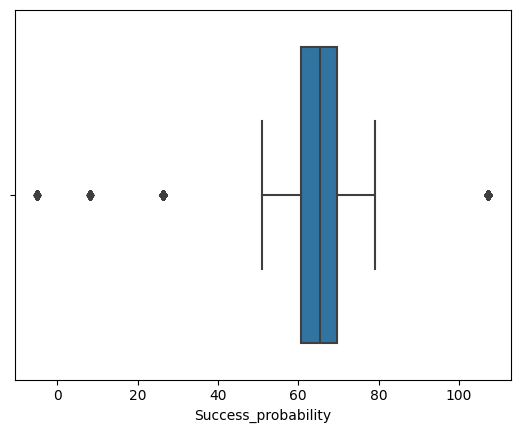

In [20]:
sns.boxplot(x = 'Success_probability',data = data)
plt.show()

In [21]:
data.loc[data['Success_probability']>100]

,Deal_title,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Lead_revenue,Fund_category,Geography,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability,source
20,TitleYHYTQ,Banks,5338.0,33362.50,2020-02-18,Product_1,500 Million - 1 Billion,Category 3,USA,"Peoria, IL",CEO/President,Early years teacher,Website,Level 1,No track,"Cashin,Marc C",Yes,5.0,107.34,train
25,TitleRDLL2,Banks,164309.0,977638.55,2020-01-27,Product_1,50 - 100 Million,Category 2,India,Chirala,Chairman/CEO/President,"Designer, multimedia",Marketing Event,Level 1,No track,"Jones,Michael L",No,5.0,107.34,train
48,TitleZITZC,Banks,376485.0,2560098.00,2020-05-02,Product_2,50 - 100 Million,Category 1,USA,"Kingsport-Bristol-Bristol, TN-VA",Vice President/GM,Secondary school teacher,Contact Email,Level 3,No track,"McKenstry,Loretta A",Yes,3.0,107.34,train
54,TitleKUWBI,Banks,420368.0,2480171.20,2020-02-16,Product_2,50 - 100 Million,Category 2,India,Rajkot,SVP/General Counsel,Horticultural therapist,Website,Level 2,Pending,"Ross,Eric L",Yes,4.0,107.34,train
65,Title8W9AG,Insurance,58778.0,405568.20,2020-02-17,Product_2,500 Million - 1 Billion,Category 4,India,Tiruchchirappalli,Chairman/CEO/President,"Accountant, chartered",Website,Level 3,No track,"Knox,Antonio D",Yes,4.0,107.34,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6977,TitleJ6OUO,Railroads,304515.0,1735735.50,2020-02-21,Product_1,100 - 500 Million,Category 2,India,Warangal,CEO/Co-Founder/Chairman,Sports development officer,Contact Email,Level 1,Pending,"Smith,Keenan H",Yes,3.0,107.34,train
6978,TitleMICX8,Human Resources,364919.0,2298989.70,2020-11-09,Product_2,500 Million - 1 Billion,Category 4,USA,"Spartanburg, SC",Chairman/Chief Innovation Officer,Fast food restaurant manager,Contact Email,Level 1,Pending,"Robinson,John C",No,1.0,107.34,train
6980,Title9SKYT,Materials/Manufacturing,148310.0,934353.00,2020-06-01,Product_1,100 - 500 Million,Category 3,India,Hubli,CEO,"Administrator, local government",Website,Level 3,Pending,"Vickers Jr.,Henry J",No,1.0,107.34,train
6997,TitleFG9CH,Banks,106817.0,742378.15,2019-10-18,Product_2,100 - 500 Million,Category 4,USA,"Erie, PA",CEO,Licensed conveyancer,Others,Level 3,Pending,"Maine,John P",Yes,5.0,107.34,train


In [22]:
data.loc[data['Success_probability']<0]

,Deal_title,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Lead_revenue,Fund_category,Geography,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability,source
50,TitleJ828U,Banks,411909.0,2471454.00,2021-02-14,Product_1,100 - 500 Million,Category 3,USA,"Sioux Falls, SD",Chairman/CEO/President,Medical laboratory scientific officer,Contact Email,Level 2,Pending,"Heidelberg,Andre D",Yes,1.0,-5.0,train
138,TitleF0RCH,Aerospace/Defense,180377.0,1145393.95,2020-05-16,Product_2,50 - 100 Million,Category 3,USA,"Altoona, PA",SVP/General Counsel,Higher education lecturer,Website,Level 3,Pending,"Cash,Tyrone J",Yes,2.0,-5.0,train
223,TitleA1251,Banks,154906.0,960417.20,2020-03-21,Product_2,50 - 100 Million,Category 1,USA,"Myrtle Beach-Conway-North Myrtle Beach, SC-NC",Executive Vice President,Solicitor,Website,Level 1,Pending,"Cashin,Marc C",Yes,2.0,-5.0,train
224,Title6XBOE,Real Estate,308734.0,1914150.80,2019-07-31,Product_1,100 - 500 Million,Category 3,India,Sirsa,Chairman/CEO/President,Agricultural engineer,Contact Email,Level 2,Pending,"Morsy,Omar A",Yes,5.0,-5.0,train
303,TitleT985L,Hotels/Motels,77206.0,451655.10,2019-09-14,Product_1,100 - 500 Million,Category 2,USA,"Montgomery, AL",Chairman/Chief Innovation Officer,Legal secretary,Website,Level 1,Pending,"Abdul-Hamid,Saud Muhamad",No,2.0,-5.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6541,TitleUBGDK,Biotech/Healthcare,279337.0,1745856.25,2020-12-17,Product_1,100 - 500 Million,Category 2,USA,"New Bern, NC",CEO,Broadcast engineer,Contact Email,Level 3,Pending,"Ullrich,Rose Anne",Yes,2.0,-5.0,train
6746,TitleJD4JF,REIT,176331.0,1199050.80,2020-10-07,Product_2,50 - 100 Million,Category 1,USA,"Olympia-Tumwater, WA",CEO,Investment analyst,Contact Email,Level 3,Pending,"Ross,Eric L",Yes,4.0,-5.0,train
6902,TitleXOLJN,Food Processing,88938.0,569203.20,2019-05-11,Product_2,100 - 500 Million,Category 2,India,Bhavnagar,CEO/President,"Engineer, electrical",Website,Level 3,Up-to-date,"Heidelberg,Andre D",Yes,4.0,-5.0,train
6911,Title6DKBW,Online Banking,485564.0,3350391.60,2020-05-07,Product_1,500 Million - 1 Billion,Category 1,India,Nanded,Chairman/CEO/President,"Producer, radio",Marketing Event,Level 2,No track,"Rocks,Michael J",Yes,5.0,-5.0,train


In [23]:
data['Success_probability'] = data['Success_probability'].apply(lambda x:100.0 if x>100 else x)
data['Success_probability'] = data['Success_probability'].apply(lambda x:0.0 if x<0 else x)

In [24]:
data['Success_probability'].fillna(value=data['Success_probability'].mean(), inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9100 entries, 0 to 9099
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Deal_title             9100 non-null   object        
 1   Industry               9100 non-null   object        
 2   Deal_value             9100 non-null   float64       
 3   Weighted_amount        9100 non-null   float64       
 4   Date_of_creation       9100 non-null   datetime64[ns]
 5   Pitch                  9100 non-null   object        
 6   Lead_revenue           9100 non-null   object        
 7   Fund_category          9100 non-null   object        
 8   Geography              9100 non-null   object        
 9   Location               9100 non-null   object        
 10  Designation            9100 non-null   object        
 11  Hiring_candidate_role  9100 non-null   object        
 12  Lead_source            9100 non-null   object        
 13  Lev

In [ ]:
'''# Column transformation pipeline
numeric_features = ['Deal_value', 'Weighted_amount']
categorical_features = ['Industry', 'Pitch', 'Lead_revenue', 'Fund_category', 'Geography', 'Location', 'Designation', 'Hiring_candidate_role', 'Lead_source', 'Level_of_meeting', 'Last_lead_update', 'Internal_POC', 'Resource','Internal_rating']'''


In [28]:
# Column transformation pipeline
numeric_features = ['Deal_value']
categorical_features = ['Industry','Lead_revenue', 'Fund_category', 'Geography', 'Level_of_meeting', 'Last_lead_update','Internal_rating']


In [29]:
#df=data[['Deal_value', 'Weighted_amount','Industry', 'Pitch', 'Lead_revenue', 'Fund_category', 'Geography', 'Location', 'Designation', 'Hiring_candidate_role', 'Lead_source', 'Level_of_meeting', 'Last_lead_update', 'Internal_POC', 'Resource','Internal_rating','Success_probability']]
df=data[['Industry','Deal_value', 'Lead_revenue', 'Fund_category', 'Geography', 'Location', 'Level_of_meeting', 'Last_lead_update', 'Internal_rating','Success_probability']]

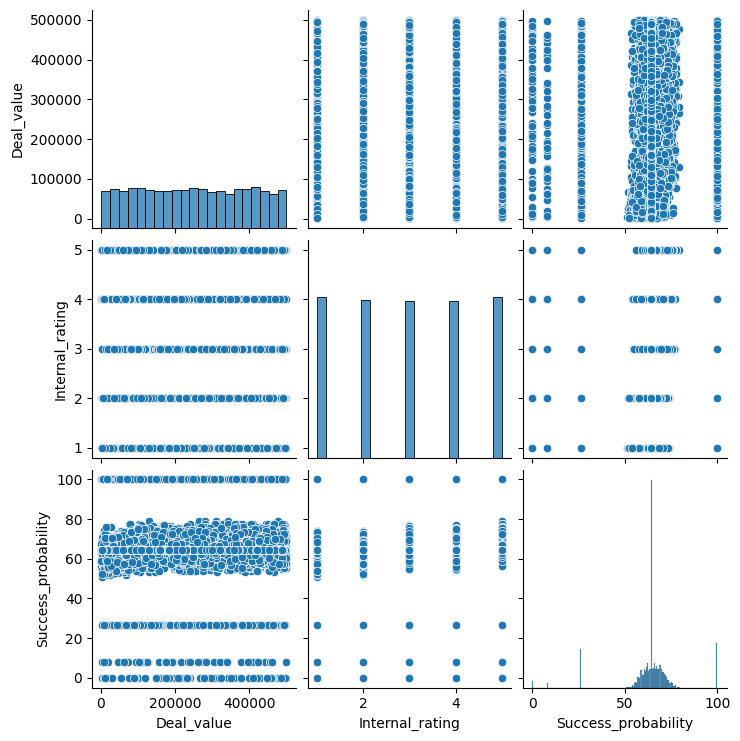

In [30]:
sns.pairplot(df)

In [31]:
numeric_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

In [32]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Success_probability'])
y = df['Success_probability']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
print(X.shape)
print(y.shape)

(9100, 9)
(9100,)


In [34]:
# Define the parameter grid for hyperparameter optimization
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [35]:
from sklearn.ensemble import RandomForestRegressor
# Build the model pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Deal_value']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Industry', 'Lead_revenue',
                                                   'Fund_category', 'Geography',
                                                   'Level_of_meeting',
                                                   'Last_lead_update',
                                                   'Internal_rating'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [36]:
# Access the trained RandomForestRegressor from the pipeline
trained_rf_regressor = model_pipeline.named_steps['model']

# Get the feature importances
feature_importances = trained_rf_regressor.feature_importances_

# Print or visualize the feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

Industry: 0.2838378038235093
Deal_value: 2.1132191848612246e-05
Lead_revenue: 0.003726411751482518
Fund_category: 0.005397490967214955
Geography: 1.3044037008343302e-05
Location: 4.2193636538389165e-05
Level_of_meeting: 0.0006703594583604473
Last_lead_update: 0.0016711181795161887
Internal_rating: 0.004982086042586836


In [ ]:
import pickle

with open('rf_classifier.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)

In [ ]:
for feature, importance in zip(X_train.columns, feature_importances):
  if importance>0.01:
    print(f"{feature}: {importance}")

Industry: 0.02470646222294134
Deal_value: 0.024252284093451263


In [ ]:
'''# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Mean Squared Error on Test Set: {mse}')'''

In [37]:
# Evaluate the model
y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 15.508891995738127


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 240.52573093547016
Root Mean Squared Error: 15.508891995738127
Mean Absolute Error: 8.688353008098648
R-squared: -0.08691414119002228


In [39]:
# Preprocess the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert sparse matrices to dense NumPy arrays
X_train_preprocessed = X_train_preprocessed.toarray()
X_test_preprocessed = X_test_preprocessed.toarray()

# Split the preprocessed data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_preprocessed, y_train, test_size=0.2, random_state=42
)

# Build the deep learning model
input_dim = X_train_split.shape[1]

model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Regression output
])

In [40]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model using the training and validation data
history = model.fit(X_train_split, y_train_split, epochs=50, batch_size=32,
                    validation_data=(X_val_split, y_val_split))


Epoch 1/50
182/182 [==============================] - 3s 7ms/step - loss: 1291.0961 - val_loss: 194.4485
Epoch 2/50
182/182 [==============================] - 1s 6ms/step - loss: 201.5928 - val_loss: 194.9910
Epoch 3/50
182/182 [==============================] - 1s 6ms/step - loss: 200.6835 - val_loss: 194.7294
Epoch 4/50
182/182 [==============================] - 1s 5ms/step - loss: 199.2626 - val_loss: 195.3046
Epoch 5/50
182/182 [==============================] - 1s 7ms/step - loss: 199.1617 - val_loss: 200.5839
Epoch 6/50
182/182 [==============================] - 1s 7ms/step - loss: 198.7012 - val_loss: 195.3859
Epoch 7/50
182/182 [==============================] - 1s 8ms/step - loss: 198.5187 - val_loss: 197.0575
Epoch 8/50
182/182 [==============================] - 2s 11ms/step - loss: 197.0767 - val_loss: 197.9883
Epoch 9/50
182/182 [==============================] - 1s 7ms/step - loss: 197.1472 - val_loss: 195.5670
Epoch 10/50
182/182 [==============================] - 1s 7ms/

In [41]:
# Evaluate the model
y_pred = model.predict(preprocessor.transform(X_test))
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

57/57 [==============================] - 0s 2ms/step
Root Mean Squared Error: 16.075358522800528


In [ ]:
0.01 * tf.math.exp(-0.1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.009048373>

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define a learning rate schedule
'''def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)'''

# Build a neural network model with advanced techniques
model = keras.Sequential([
    layers.Input(shape=(X_train_split.shape[1],)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model with a custom learning rate and optimizer
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Define callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
#lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
#history = model.fit(X_train_split, y_train_split, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])
history = model.fit(X_train_split, y_train_split, epochs=300, batch_size=32, validation_split=0.2)
# Evaluate the model
test_loss, test_mae = model.evaluate(X_val_split, y_val_split)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


Epoch 1/300
146/146 [==============================] - 2s 5ms/step - loss: 4355.4473 - mean_absolute_error: 64.3341 - val_loss: 4334.1626 - val_mean_absolute_error: 64.3936
Epoch 2/300
146/146 [==============================] - 1s 4ms/step - loss: 4335.9629 - mean_absolute_error: 64.1909 - val_loss: 4317.1196 - val_mean_absolute_error: 64.2686
Epoch 3/300
146/146 [==============================] - 1s 4ms/step - loss: 4314.8950 - mean_absolute_error: 64.0418 - val_loss: 4281.8623 - val_mean_absolute_error: 64.0083
Epoch 4/300
146/146 [==============================] - 1s 6ms/step - loss: 4290.7100 - mean_absolute_error: 63.8604 - val_loss: 4241.4399 - val_mean_absolute_error: 63.7079
Epoch 5/300
146/146 [==============================] - 1s 5ms/step - loss: 4262.1929 - mean_absolute_error: 63.6473 - val_loss: 4210.1440 - val_mean_absolute_error: 63.4744
Epoch 6/300
146/146 [==============================] - 1s 5ms/step - loss: 4230.4185 - mean_absolute_error: 63.4139 - val_loss: 4176.83